In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
import gsw as sw


In [2]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)

lon = np.array(f['lon'])
lat = np.array(f['lat'])
S = np.array(f['S'])
T = np.array(f['T'])
ostreo = np.array(f['ostreo'])
z = np.array(f['z'])

kuro = np.where(np.logical_or(np.logical_and(lon > 140,T>18.1),T<16))

In [3]:
# calculate distance and delta S
lon = lon[kuro]
lat = lat[kuro]

dS = np.abs(np.diff(S[kuro],n=1))
dL = sw.distance(lat, lon)

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


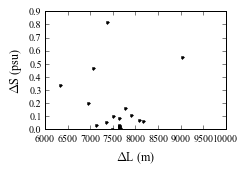

In [4]:
# make a plot of the data
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

figs4 = plt.figure(4, figsize=(3.5, 2.5), dpi = 1200)
plt.plot(dL[0,], dS, '.k')
plt.xlim([6000, 10000])
plt.xlabel(r'$\Delta$L (m)', fontsize = 12)
plt.ylabel(r'$\Delta$S (psu)', fontsize = 12)

figs4.savefig('/Users/sclayton/Desktop/LO_figS4.tiff', format='tiff', dpi=1200)

[  5.13092783e-07   7.39784775e-07   2.07602975e-07   7.12926225e-10
   5.70577927e-07   8.12757481e-06   1.91608308e-06   4.50299416e-07
   4.42966814e-05   3.74275236e-05   2.79807325e-05   6.33242148e-07
   6.17755015e-10   2.87318482e-08   1.84244056e-06   1.23526093e-04
   9.15482338e-06   4.28387759e-06   2.57091113e-07   1.26621499e-06
   2.19947333e-07   4.06999699e-08   1.92363326e-08   1.12468933e-07
   1.32630143e-07]


(array([ 2.,  0.,  1.,  2.,  5.,  5.,  3.,  3.,  1.,  3.]),
 array([-9.20918372, -8.67908948, -8.14899523, -7.61890099, -7.08880675,
        -6.55871251, -6.02861826, -5.49852402, -4.96842978, -4.43833554,
        -3.90824129]),
 <a list of 10 Patch objects>)

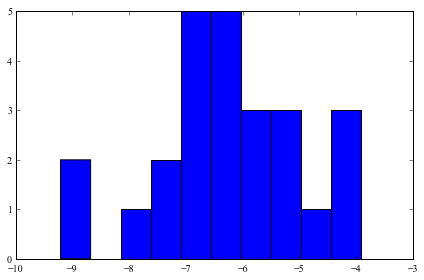

In [5]:
print 10**4*(dS[4:]**2/dL[0,4:]**2)

plt.hist(np.log10(10**4*(dS[4:]**2/dL[0,4:]**2)))